Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Number of epoches 1999 ,Real Accuracy0.4699999988079071 , Fake Accuracy 0.7699999809265137 


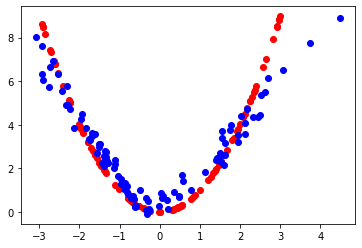

Number of epoches 3999 ,Real Accuracy0.5299999713897705 , Fake Accuracy 0.5699999928474426 


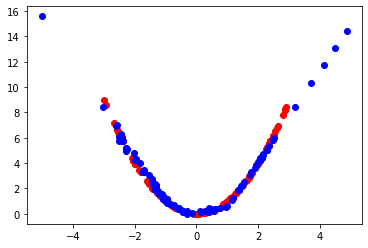

Number of epoches 5999 ,Real Accuracy0.6200000047683716 , Fake Accuracy 0.41999998688697815 


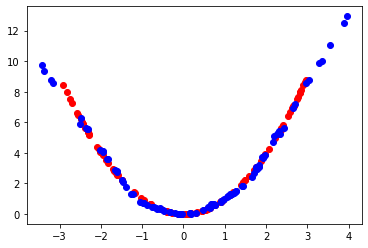

Number of epoches 7999 ,Real Accuracy0.6800000071525574 , Fake Accuracy 0.4099999964237213 


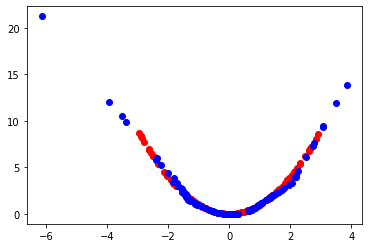

Number of epoches 9999 ,Real Accuracy0.3499999940395355 , Fake Accuracy 0.6200000047683716 


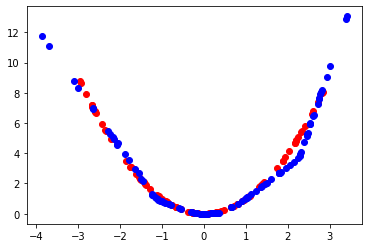

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import numpy as np
from matplotlib import pyplot


def powertwo(n=10):
    #  numpy.random.rand(shape) * (high - min) + min
    X1 = np.random.rand(n) * (3 - (-3)) + -3
    # print(X1)
    X2 = X1 * X1
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = np.hstack((X1, X2))
    y = np.ones((n, 1))
    return X, y


def hidden_points(deep, n):
    x_input = np.random.randn(deep * n)
    x_input = x_input.reshape(n, deep)
    return x_input


def testdata(hidden, deep, n):
    x_input = hidden_points(deep, n)
    X = hidden.predict(x_input)
    y = np.zeros((n, 1))
    return X, y


def base_hidden_model(deep, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=deep))
    model.add(Dense(n_outputs, activation='linear'))
    return model


def base_model(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation="relu", kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


def compile_model(hidden, base):
    base.trainable = False
    model = Sequential()
    model.add(hidden)
    model.add(base)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


def show(epoch, hidden, base, deep, n=100):
    x_real, y_real = powertwo(n)
    _, acc_real = base.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = testdata(hidden, deep, n)
    _, acc_fake = base.evaluate(x_fake, y_fake, verbose=0)
    print("Number of epoches {} ,Real Accuracy{} , Fake Accuracy {} ".format(epoch, acc_real, acc_fake))
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()


def train(g_model, d_model, gan_model, deep, n_epochs=10000, n_batch=128, n_eval=2000):
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        x_real, y_real = powertwo(half_batch)
        x_fake, y_fake = testdata(g_model, deep, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = hidden_points(deep, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)
        if (i + 1) % n_eval == 0:
            show(i, g_model, d_model, deep)
            


deep = 5
base = base_model()
hidden = base_hidden_model(deep)
gan = compile_model(hidden, base)
train(hidden, base, gan, deep)